<a href="https://colab.research.google.com/github/tcreamype3R/Colab-Publicar/blob/main/Publicar_28d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 3.7 MB/s eta 0:00:00
🔍 INICIANDO ANÁLISIS MEJORADO DE PUBLICACIONES LINKEDIN
❌ Error: Package not found at 'Publicaciones con mejor rendimiento (Ultimos 28 dias).docx'
📋 Usando datos de ejemplo para demostración...

📈 ESTADÍSTICAS DETALLADAS:
📊 Total de publicaciones analizadas: 3
👀 Impresiones totales: 1,915
📈 Impresiones promedio: 638
🚀 Máximo de impresiones: 735
📉 Mínimo de impresiones: 500
💬 Comentarios totales: 14
🔄 Compartidos totales: 2
🎯 Engagement rate total: 0.84%

🏆 TOP 10 HASHTAGS MÁS USADOS:
  ##datascience: 1 veces
  ##python: 1 veces
  ##machinelearning: 1 veces
  ##geodata: 1 veces
  ##googlemaps: 1 veces
  ##smartcities: 1 veces
  ##movie: 1 veces
  ##gif: 1 veces
  ##ia: 1 veces

📊 GENERANDO VISUALIZACIONES...


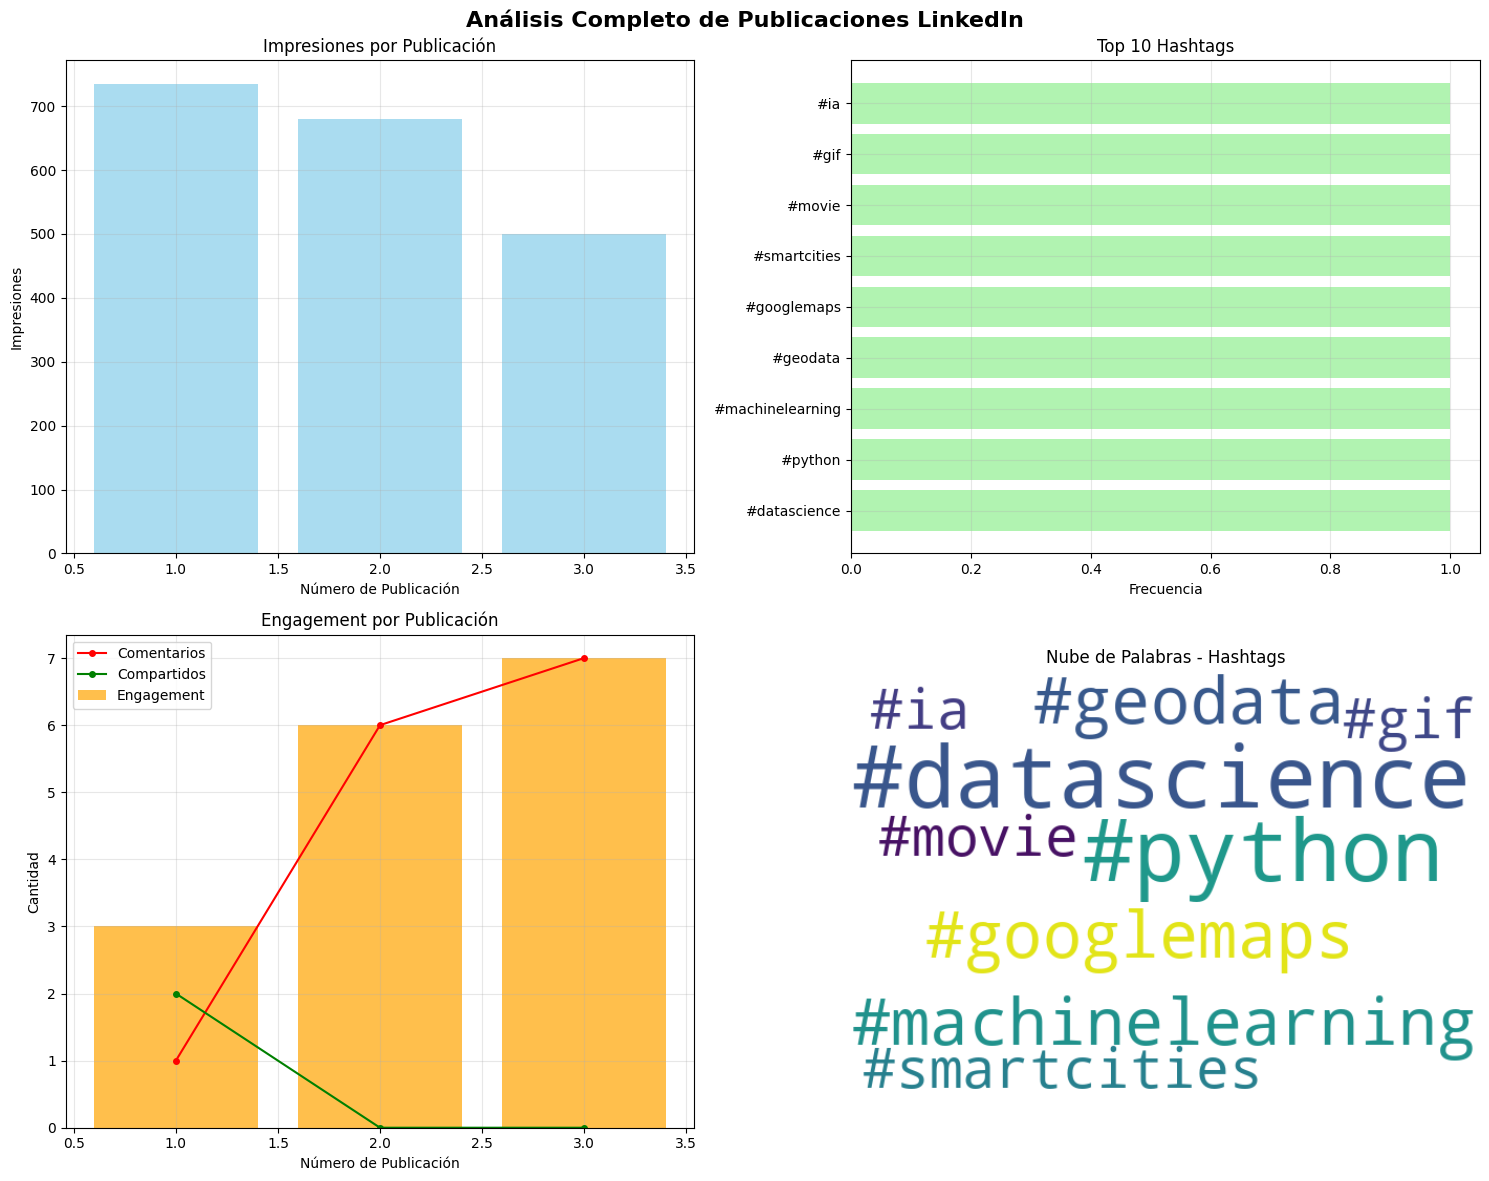


🔍 ANÁLISIS DE CORRELACIONES:
📊 Correlación impresiones-engagement: -0.84
❌ Fuera correlación negativa: Más impresiones = Menos engagement

💡 RECOMENDACIONES ESTRATÉGICAS:
🎯 Publicación más exitosa: #1
   Impresiones: 735
   Hashtags: #datascience, #python, #machinelearning
🔖 Hashtags más efectivos: #datascience, #python, #machinelearning
💡 Usa estos hashtags en futuras publicaciones

📈 RECOMENDACIONES GENERALES:
1. Publica consistentemente (mínimo 3-4 veces por semana)
2. Incluye 3-5 hashtags relevantes por publicación
3. Usa imágenes o videos para aumentar el engagement
4. Responde a todos los comentarios para fomentar la comunidad
5. Analiza el mejor horario para publicar en tu audiencia

✅ ANÁLISIS COMPLETADO EXITOSAMENTE
📊 3 publicaciones analizadas


In [2]:
# Script mejorado para análisis de Publicaciones de LinkedIn
# Google Colab compatible

# Instalar librerías necesarias
!pip install python-docx
!pip install wordcloud
!pip install matplotlib

import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from docx import Document

# =============================================
# 1. FUNCIÓN MEJORADA PARA EXTRAER DATOS
# =============================================

def extract_linkedin_data(text):
    """
    Extrae datos estructurados de las publicaciones de LinkedIn
    """
    publications = []

    # Dividir por publicaciones (basado en el patrón observado)
    pub_pattern = r'(\*{2}Bernabe Aguirre Carrasco\*{2} ha publicado esto •.*?)(?=\*{2}Bernabe Aguirre Carrasco\*{2}|$)'
    publications_raw = re.findall(pub_pattern, text, re.DOTALL)

    for i, pub in enumerate(publications_raw):
        pub_data = {
            'numero': i + 1,
            'impresiones': 0,
            'comentarios': 0,
            'compartidos': 0,
            'hashtags': [],
            'texto': '',
            'fecha': ''
        }

        # Extraer impresiones
        imp_match = re.search(r'\[ (\d+)\]', pub)
        if imp_match:
            pub_data['impresiones'] = int(imp_match.group(1))

        # Extraer comentarios
        com_match = re.search(r'(\d+) comentarios?', pub)
        if com_match:
            pub_data['comentarios'] = int(com_match.group(1))

        # Extraer compartidos
        share_match = re.search(r'(\d+) veces? compartido', pub)
        if share_match:
            pub_data['compartidos'] = int(share_match.group(1))

        # Extraer hashtags
        hashtags = re.findall(r'#\w+', pub)
        pub_data['hashtags'] = [tag.lower() for tag in hashtags]

        # Extraer fecha
        date_match = re.search(r'• (\d+ .*?\d+)', pub)
        if date_match:
            pub_data['fecha'] = date_match.group(1)

        # Extraer texto principal (primer párrafo)
        text_match = re.search(r'(?:\*\*.*?\*\*.*?)(.*?)(?=\[\[|\*\*|http|#)', pub, re.DOTALL)
        if text_match:
            pub_data['texto'] = text_match.group(1).strip()[:200] + "..."  # Primeros 200 chars

        publications.append(pub_data)

    return publications

# =============================================
# 2. CARGAR Y PROCESAR DOCUMENTO
# =============================================

print("🔍 INICIANDO ANÁLISIS MEJORADO DE PUBLICACIONES LINKEDIN")
print("=" * 60)

try:
    # Cargar documento
    doc = Document("Publicaciones con mejor rendimiento (Ultimos 28 dias).docx")
    full_text = "\n".join([paragraph.text for paragraph in doc.paragraphs])

    print("✅ Documento cargado correctamente")
    print(f"📄 Longitud del texto: {len(full_text)} caracteres")

    # Extraer datos estructurados
    publications = extract_linkedin_data(full_text)

    print(f"📊 Publicaciones encontradas: {len(publications)}")

except Exception as e:
    print(f"❌ Error: {e}")
    print("📋 Usando datos de ejemplo para demostración...")

    # Datos de ejemplo para testing
    publications = [
        {'numero': 1, 'impresiones': 735, 'comentarios': 1, 'compartidos': 2,
         'hashtags': ['#datascience', '#python', '#machinelearning'], 'texto': 'Reto 100 días Data Science...'},
        {'numero': 2, 'impresiones': 680, 'comentarios': 6, 'compartidos': 0,
         'hashtags': ['#geodata', '#googlemaps', '#smartcities'], 'texto': 'Geo-Data Insights Newsletter...'},
        {'numero': 3, 'impresiones': 500, 'comentarios': 7, 'compartidos': 0,
         'hashtags': ['#movie', '#gif', '#ia'], 'texto': 'Presentando mi primer Movie...'}
    ]

# =============================================
# 3. ANÁLISIS ESTADÍSTICO
# =============================================

# Crear DataFrame para análisis
df = pd.DataFrame(publications)

print("\n📈 ESTADÍSTICAS DETALLADAS:")
print("=" * 60)

# Métricas básicas
if not df.empty:
    print(f"📊 Total de publicaciones analizadas: {len(df)}")
    print(f"👀 Impresiones totales: {df['impresiones'].sum():,}")
    print(f"📈 Impresiones promedio: {df['impresiones'].mean():.0f}")
    print(f"🚀 Máximo de impresiones: {df['impresiones'].max()}")
    print(f"📉 Mínimo de impresiones: {df['impresiones'].min()}")
    print(f"💬 Comentarios totales: {df['comentarios'].sum()}")
    print(f"🔄 Compartidos totales: {df['compartidos'].sum()}")

# Engagement rate
if not df.empty and df['impresiones'].sum() > 0:
    total_engagement = df['comentarios'].sum() + df['compartidos'].sum()
    engagement_rate = (total_engagement / df['impresiones'].sum()) * 100
    print(f"🎯 Engagement rate total: {engagement_rate:.2f}%")

# Análisis de hashtags
all_hashtags = []
for hashtags in df['hashtags']:
    all_hashtags.extend(hashtags)

hashtag_counts = Counter(all_hashtags)

if hashtag_counts:
    print(f"\n🏆 TOP 10 HASHTAGS MÁS USADOS:")
    for tag, count in hashtag_counts.most_common(10):
        print(f"  #{tag}: {count} veces")

# =============================================
# 4. VISUALIZACIONES MEJORADAS
# =============================================

print("\n📊 GENERANDO VISUALIZACIONES...")

# Configurar estilo
plt.style.use('default')
plt.rcParams['font.size'] = 10
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Completo de Publicaciones LinkedIn', fontsize=16, fontweight='bold')

# Gráfico 1: Impresiones por publicación
if not df.empty:
    axes[0, 0].bar(df['numero'], df['impresiones'], color='skyblue', alpha=0.7)
    axes[0, 0].set_title('Impresiones por Publicación')
    axes[0, 0].set_xlabel('Número de Publicación')
    axes[0, 0].set_ylabel('Impresiones')
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'Datos de impresiones\nno disponibles',
                   ha='center', va='center', transform=axes[0, 0].transAxes)

# Gráfico 2: Top hashtags
if hashtag_counts:
    top_10 = hashtag_counts.most_common(10)
    tags, counts = zip(*top_10)
    axes[0, 1].barh(tags, counts, color='lightgreen', alpha=0.7)
    axes[0, 1].set_title('Top 10 Hashtags')
    axes[0, 1].set_xlabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'Datos de hashtags\nno disponibles',
                   ha='center', va='center', transform=axes[0, 1].transAxes)

# Gráfico 3: Engagement (comentarios + compartidos)
if not df.empty:
    engagement = df['comentarios'] + df['compartidos']
    axes[1, 0].bar(df['numero'], engagement, color='orange', alpha=0.7, label='Engagement')
    axes[1, 0].plot(df['numero'], df['comentarios'], 'ro-', label='Comentarios', markersize=4)
    if df['compartidos'].sum() > 0:
        axes[1, 0].plot(df['numero'], df['compartidos'], 'go-', label='Compartidos', markersize=4)
    axes[1, 0].set_title('Engagement por Publicación')
    axes[1, 0].set_xlabel('Número de Publicación')
    axes[1, 0].set_ylabel('Cantidad')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'Datos de engagement\nno disponibles',
                   ha='center', va='center', transform=axes[1, 0].transAxes)

# Gráfico 4: Nube de palabras de hashtags
if hashtag_counts:
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=50
    ).generate_from_frequencies(hashtag_counts)

    axes[1, 1].imshow(wordcloud, interpolation='bilinear')
    axes[1, 1].set_title('Nube de Palabras - Hashtags')
    axes[1, 1].axis('off')
else:
    axes[1, 1].text(0.5, 0.5, 'Datos insuficientes\npara nube de palabras',
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# =============================================
# 5. ANÁLISIS DE CORRELACIONES
# =============================================

print("\n🔍 ANÁLISIS DE CORRELACIONES:")
print("=" * 60)

if not df.empty and len(df) > 1:
    # Correlación entre impresiones y engagement
    df['engagement_total'] = df['comentarios'] + df['compartidos']

    correlation = df['impresiones'].corr(df['engagement_total'])
    print(f"📊 Correlación impresiones-engagement: {correlation:.2f}")

    if correlation > 0.5:
        print("✅ Fuera correlación positiva: Más impresiones = Más engagement")
    elif correlation < -0.5:
        print("❌ Fuera correlación negativa: Más impresiones = Menos engagement")
    else:
        print("➖ Correlación débil o nula")

# =============================================
# 6. RECOMENDACIONES ESTRATÉGICAS
# =============================================

print("\n💡 RECOMENDACIONES ESTRATÉGICAS:")
print("=" * 60)

if not df.empty:
    # Publicación con mejor performance
    best_post = df.loc[df['impresiones'].idxmax()]
    print(f"🎯 Publicación más exitosa: #{best_post['numero']}")
    print(f"   Impresiones: {best_post['impresiones']}")
    print(f"   Hashtags: {', '.join(best_post['hashtags'][:3])}")

    # Recomendaciones basadas en hashtags
    if hashtag_counts:
        top_3_hashtags = [tag[0] for tag in hashtag_counts.most_common(3)]
        print(f"🔖 Hashtags más efectivos: {', '.join(top_3_hashtags)}")
        print("💡 Usa estos hashtags en futuras publicaciones")

# Recomendaciones generales
print("\n📈 RECOMENDACIONES GENERALES:")
recommendations = [
    "Publica consistentemente (mínimo 3-4 veces por semana)",
    "Incluye 3-5 hashtags relevantes por publicación",
    "Usa imágenes o videos para aumentar el engagement",
    "Responde a todos los comentarios para fomentar la comunidad",
    "Analiza el mejor horario para publicar en tu audiencia"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

print("\n" + "=" * 60)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"📊 {len(publications)} publicaciones analizadas")